# Content
*   Files and Folders
*   Libaries required
    + installing libaraies
*   Data Preprocessing
    + load data
    + cleaning
    + checking null
    + converting Object type data to numerical
    + Saving all Mapping to a JSON file
        - encoding_mappings.json
*   Feature Engineering
     + Combining existing features for create new features   
        - Total_Cost = Subscription_Length_Months x  Monthly_Bill
        - Bill_Per_GB = Monthly_Bill / Total_Usage_GB
        - Usage_To_Bill_Ratio = Total_Usage_GB / Monthly_Bill
     + Plot Correlation matrix
     + Evaluating best features
*   Model Building:
    + Comparing different models:
      - Decision_Tree
      - Random_Forest
      - KNN
      - AdaBoost
      - Gradient_Boosting
      - Logistic_Regression
      - SVC
      - Naive_Bayes
      - MLP_Classifier
    + storing Scale data to a JSON file
    + storing Model train acc > 0.8
      - save All Model to a folder
        folder name -> /content/models
    + plot train chart
    + plot test chart
*   Model Optimization:
      - Random_Forest
*   Model Deployment:
      - client setup
      - client model : Random_Forest
      - client
      
*   Apply Neural Network
*   Apply XGBoost Classifier
    - model
    - k fold validation
*   Visualization of data


# Files and Folder
-  Kaggle.json
-  customer_chunk_large_dataset.xlsx
-  models\

In [ ]:
!pip install kaggle

In [ ]:
!pip install joblib

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
print('connection done!')

connection done!


In [3]:
!kaggle datasets download -d vaibhavjain2004/cust-churn-task
!unzip cust-churn-task.zip

  0% 0.00/3.48M [00:00<?, ?B/s]
100% 3.48M/3.48M [00:00<00:00, 164MB/s]
Archive:  cust-churn-task.zip
  inflating: customer_churn_large_dataset.xlsx  


In [4]:
import os
os.mkdir('models')

# Data Preprocessing:

load data

In [5]:
import pandas as pd
df = pd.read_excel("/content/customer_churn_large_dataset.xlsx")
df[:5]

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


cleaning
- Remove unwanted columns

In [258]:
df=df.drop(['CustomerID'	,'Name'], axis=1)
df.columns.tolist() # view columns

['Age',
 'Gender',
 'Location',
 'Subscription_Length_Months',
 'Monthly_Bill',
 'Total_Usage_GB',
 'Churn']

- checking null

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [268]:
df.isnull().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

convert object type data to numeric

In [6]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# column we want to encode
df_encode=pd.DataFrame()
df_encode['Gender'] = label_encoder.fit_transform(df['Gender'])
df_encode['Location'] = label_encoder.fit_transform(df['Location'])
df_encode[['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn']] = df[['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn']]
df_encode[:3]

,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,2,17,73.36,236,0
1,0,4,1,48.76,172,0
2,0,2,5,85.47,460,0


In [7]:
import json

# Create a mapping dictionary for 'Gender'
unique_gender_values = df['Gender'].unique()
encoded_gender_values = df_encode['Gender'].unique()
gender_mapping = { unique_gender_values[i]: encoded_gender_values[i] for i in range(len(unique_gender_values))}

# Create a mapping dictionary for 'Location'
unique_location_values = df['Location'].unique()
encoded_location_values = df_encode['Location'].unique()
location_mapping = {unique_location_values[i]: encoded_location_values[i] for i in range(len(unique_location_values))}

# Combine both mappings into a single dictionary
encoding_mappings = {
    'Gender': str(gender_mapping),
    'Location': str(location_mapping)
}

# Save the encoding mappings to a JSON file with indentation
with open('encoding_mappings.json', 'w') as json_file:
    json.dump(encoding_mappings, json_file, indent=4)

print("Mappings saved to 'encoding_mappings.json'")


Mappings saved to 'encoding_mappings.json'


*Feature Engineering:*
- Total_Cost = Subscription_Length_Months x  Monthly_Bill
- Bill_Per_GB = Monthly_Bill / Total_Usage_GB
- Usage_To_Bill_Ratio = Total_Usage_GB / Monthly_Bill

In [8]:
x_df=pd.DataFrame()
x_df['Total_Cost'] = df['Subscription_Length_Months'] * df['Monthly_Bill']
x_df['Bill_Per_GB'] = df['Monthly_Bill'] / df['Total_Usage_GB']
x_df['Usage_To_Bill_Ratio'] = df['Total_Usage_GB'] / df['Monthly_Bill']
x_df[:3]

,Total_Cost,Bill_Per_GB,Usage_To_Bill_Ratio
0,1247.12,0.310847,3.217012
1,48.76,0.283488,3.527482
2,427.35,0.185804,5.382005


comibine all dataframes

In [9]:
data = pd.concat([x_df, df_encode], axis=1)
data[:3]


,Total_Cost,Bill_Per_GB,Usage_To_Bill_Ratio,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1247.12,0.310847,3.217012,1,2,17,73.36,236,0
1,48.76,0.283488,3.527482,0,4,1,48.76,172,0
2,427.35,0.185804,5.382005,0,2,5,85.47,460,0


Correlation Matrix

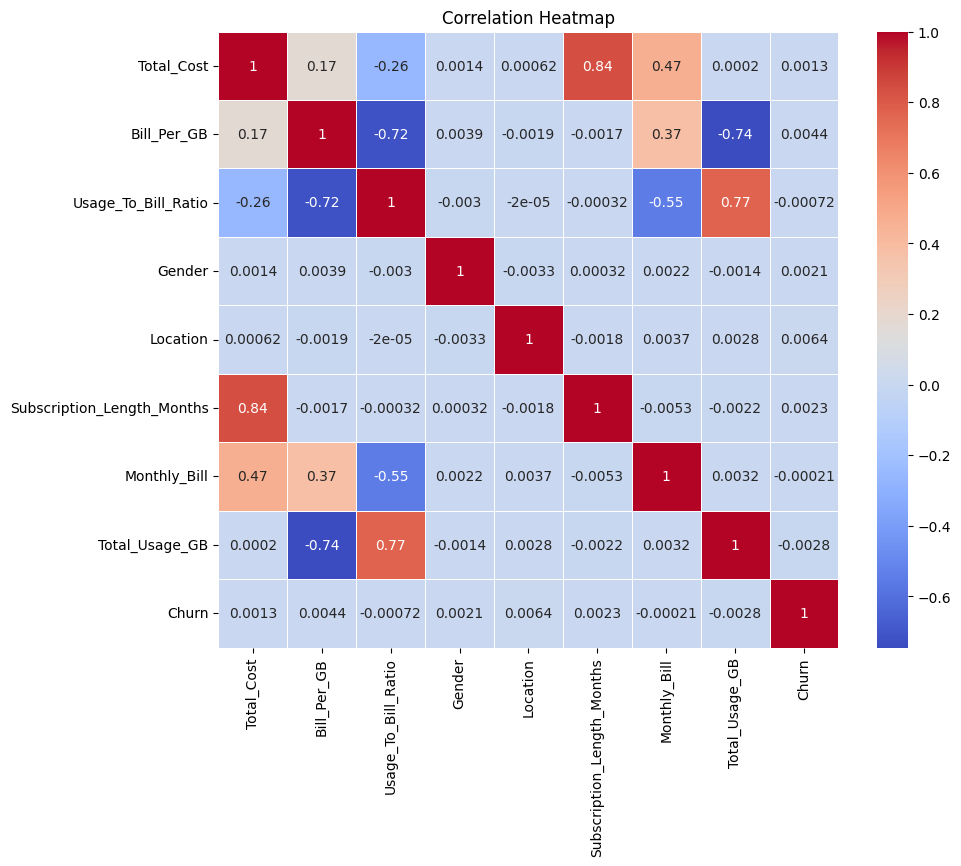

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_color(corr_matrix):
    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()
plot_color(data.corr())
#plot_color(df_encode.corr())

Evaluating best features

In [30]:
from sklearn.feature_selection import SelectKBest, chi2

X=data.drop('Churn', axis=1)
y=data['Churn']

# Select the top 10 features based on chi-squared test
selector = SelectKBest(score_func=chi2, k=3)
X_new = selector.fit_transform(X, y)

# Get the selected features
selected_features = X.columns[selector.get_support()]
print('best 3 features are :', selected_features)


best 3 features are : Index(['Total_Cost', 'Location', 'Total_Usage_GB'], dtype='object')


# Models

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import joblib

selected_x=data[['Total_Cost', 'Location', 'Total_Usage_GB']]
scaler=StandardScaler()
scaled_X_train = scaler.fit_transform(selected_x)
# Save the mean_ and scale_ attributes
joblib.dump(scaler.mean_, 'scaler_mean.pkl')
joblib.dump(scaler.scale_, 'scaler_scale.pkl')
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X_train, y, test_size=0.9, random_state=42)

# Create dict store model names and metrics
model_metrics={}

# Define the classifiers
classifiers = [
    ('Decision_Tree', DecisionTreeClassifier(random_state=42)),
    ('Random_Forest', RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)), # optimization
    #('Random_Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=2)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Gradient_Boosting', GradientBoostingClassifier(random_state=42)),
    ('Logistic_Regression', LogisticRegression(random_state=42)),
    ('SVC', SVC(random_state=42)),
    ('Naive_Bayes', GaussianNB()),
    ('MLP_Classifier', MLPClassifier(random_state=42))
]


# Iterate through classifiers
for name, model in classifiers:
    pipeline = Pipeline([
        (name, model)
    ])

    # Fit the model to the training data
    pipeline.fit(X_train, y_train)

    # Predict on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    train_acc = accuracy_score(y_train, pipeline.predict(X_train))

    #save model if train properly
    if train_acc > 0.8 :
      joblib.dump(pipeline, '/content/models/'+name+'.pkl')

    # Save metrics in the model_metrics dictionary
    model_metrics[name] = {
        'train_accuracy': train_acc,
        'test_accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }



# Train and evaluate each classifier

In [24]:
info = pd.DataFrame.from_dict(model_metrics, orient='index')
info

,train_accuracy,test_accuracy,precision,recall,f1_score
Decision_Tree,1.0000,0.501267,0.498700,0.505696,0.502174
Random_Forest,1.0000,0.500400,0.497763,0.487156,0.492403
KNN,0.7514,0.499256,0.493286,0.245354,0.327709
AdaBoost,0.5388,0.504733,0.502096,0.519098,0.510456
Gradient_Boosting,0.5842,0.501778,0.499277,0.555374,0.525834
Logistic_Regression,0.5080,0.498100,0.495913,0.546149,0.519820
SVC,0.5255,0.500267,0.497907,0.552694,0.523872
Naive_Bayes,0.5057,0.496711,0.494778,0.558725,0.524811
MLP_Classifier,0.5197,0.500222,0.496951,0.385923,0.434456


In [21]:
info = pd.DataFrame.from_dict(model_metrics, orient='index')
info

,train_accuracy,test_accuracy,precision,recall,f1_score
Decision_Tree,1.0,0.501267,0.498700,0.505696,0.502174
Random_Forest,1.0,0.500400,0.497763,0.487156,0.492403


In [17]:
info = pd.DataFrame.from_dict(model_metrics, orient='index')
info

,train_accuracy,test_accuracy,precision,recall,f1_score
Decision_Tree,1.0000,0.501267,0.498700,0.505696,0.502174
Random_Forest,0.8421,0.499067,0.496492,0.499553,0.498018


In [429]:
# Result
info = pd.DataFrame.from_dict(model_metrics, orient='index')
info

,train_accuracy,test_accuracy,precision,recall,f1_score
KNN,0.749857,0.502100,0.494021,0.247643,0.329909
Decision Tree,0.999957,0.503000,0.497938,0.504243,0.501071
Random Forest,0.999957,0.499700,0.494399,0.478583,0.486363
AdaBoost,0.516186,0.499333,0.494035,0.479728,0.486776
Gradient Boosting,0.535029,0.499367,0.493562,0.441474,0.466067
Logistic Regression,0.504829,0.502800,0.497302,0.422077,0.456612
SVC,0.517829,0.498267,0.491682,0.406048,0.444781
Naive Bayes,0.503814,0.503733,0.498107,0.354391,0.414135
MLP Classifier,0.515714,0.495667,0.490594,0.495286,0.492928


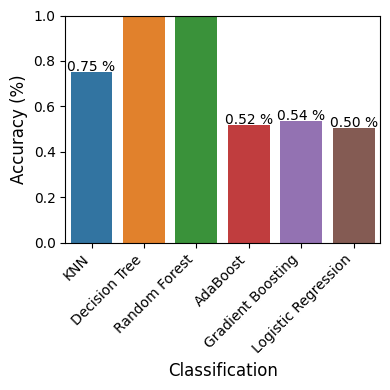

In [420]:
import matplotlib.pyplot as plt
import numpy as np

def graph(models,accuracy_list):
  plt.figure(figsize=(4, 4))
  ax = sns.barplot(x=models, y=accuracy_list)
  plt.xlabel("Classification", fontsize=12)
  plt.ylabel("Accuracy (%)", fontsize=12)

  # Annotate each bar with its respective height
  for p in ax.patches:
      width = p.get_width()
      height = p.get_height()
      x = p.get_x()
      y = p.get_y()
      ax.annotate(f"{height:.2f} %", (x + width/2, y + height*1.01), ha="center")

  # Rotate x-axis labels
  ax.set_xticklabels(models, rotation=45, ha="right")
  plt.ylim(0, 1)
  plt.tight_layout()  # Ensures labels don't overlap
  plt.show()


# Get all model names
model_names = list(model_metrics.keys())

# Get corresponding training/testing accuracies
train_acc=[metrics['train_accuracy'] for metrics in model_metrics.values()]
test_acc=[metrics['test_accuracy'] for metrics in model_metrics.values()]

graph(model_names,train_acc)


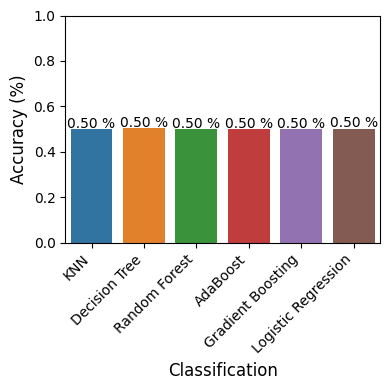

In [421]:
graph(model_names,test_acc)

# Model Deployment:

# Client side
 setup

In [100]:
import json

# Load the encoding mappings from the JSON file
with open('encoding_mappings.json', 'r') as json_file:
    encoding_mappings = json.load(json_file)

# Retrieve the mapping for 'Gender'
gender_mapping = encoding_mappings['Gender']

# Retrieve the mapping for 'Location'
location_mapping = encoding_mappings['Location']

gender_dict = json.loads(gender_mapping.replace("'", "\""))
location_dict = json.loads(location_mapping.replace("'", "\""))
#gender_dict['Male']
#location_dict['New York']

4

client model

In [163]:
import joblib

def model_run(subscription_length, monthly_bill, location, total_usage_gb):

  loaded_model_dt = joblib.load('/content/models/Decision_Tree.pkl')
  mean_values = joblib.load('scaler_mean.pkl')
  scale_values = joblib.load('scaler_scale.pkl')

  # Create a new StandardScaler with the loaded mean_ and scale_
  scaler = StandardScaler()
  scaler.mean_ = mean_values
  scaler.scale_ = scale_values
  # Prepare the input data
  row = [[subscription_length * monthly_bill, location_dict[location], total_usage_gb]]

  # Transform the input data using the loaded scaler
  test_data = scaler.transform(row)

  # Make predictions
  predict_y = loaded_model_dt.predict(test_data)

  return predict_y[0]

#model_run(17, 73.36, 'Los Angeles', 236)

client UI

In [162]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

def create_dataframe(subscription_length, monthly_bill, location, total_usage_gb,churn):
    data = {
        'Subscription_Length_Months': [subscription_length],
        'Monthly_Bill': [monthly_bill],
        'Location': [location],
        'Total_Usage_GB': [total_usage_gb],
        'Churn': [churn]
    }
    return pd.DataFrame(data)



subscription_length_widget = widgets.FloatText(description='Subscription Length (Months):')

monthly_bill_widget = widgets.FloatText(description='Monthly Bill:')

location_widget = widgets.Dropdown(
    options=set(df.Location.tolist()),  # Add your location options here
    description='Location:'
)
total_usage_gb_widget = widgets.FloatText(description='Total Usage (GB):')


def on_button_click(b):
    subscription_length = subscription_length_widget.value
    monthly_bill = monthly_bill_widget.value
    location = location_widget.value
    total_usage_gb = total_usage_gb_widget.value
    churn=model_run(subscription_length, monthly_bill, location, total_usage_gb)
    new_data = create_dataframe(subscription_length, monthly_bill, location, total_usage_gb,churn)
    display(new_data)


# Button to trigger DataFrame creation
create_dataframe_button = widgets.Button(description='Go')
create_dataframe_button.on_click(on_button_click)


widgets.VBox([
    subscription_length_widget,
    monthly_bill_widget,
    location_widget,
    total_usage_gb_widget,
    create_dataframe_button
])

#model_run(17, 73.36, 'Los Angeles', 236)


,Subscription_Length_Months,Monthly_Bill,Location,Total_Usage_GB,Churn
0,17.0,73.36,Los Angeles,236.0,[0]


,Subscription_Length_Months,Monthly_Bill,Location,Total_Usage_GB,Churn
0,21.0,273.36,Los Angeles,236.0,1


# Neural network

In [84]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

def create_and_evaluate_1d_model(dataframe, test_size=0.2, epochs=20, batch_size=32):
    X = dataframe.drop('Churn', axis=1)
    y = dataframe['Churn']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Scale the input features
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create a sequential model
    model = Sequential()

    # Add layers to the model
    model.add(Dense(units=1024, activation='relu', input_dim=X_train_scaled.shape[1]))
    model.add(Dense(units=512, activation='relu'))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=8, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

    # Evaluate the model on the test data
    y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

# Have a DataFrame named 'data' with input features and a 'Churn' column as the target variable.
results = create_and_evaluate_1d_model(data, epochs=15, batch_size=32)
print(results)


Epoch 1/15
2000/2000 [==============================] - 42s 19ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6932 - val_accuracy: 0.4961
Epoch 2/15
2000/2000 [==============================] - 35s 17ms/step - loss: 0.6932 - accuracy: 0.5037 - val_loss: 0.6932 - val_accuracy: 0.4957
Epoch 3/15
2000/2000 [==============================] - 41s 21ms/step - loss: 0.6931 - accuracy: 0.5010 - val_loss: 0.6934 - val_accuracy: 0.4961
Epoch 4/15
2000/2000 [==============================] - 27s 14ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4961
Epoch 5/15
2000/2000 [==============================] - 26s 13ms/step - loss: 0.6931 - accuracy: 0.5006 - val_loss: 0.6934 - val_accuracy: 0.4961
Epoch 6/15
2000/2000 [==============================] - 26s 13ms/step - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.4982
Epoch 7/15
2000/2000 [==============================] - 30s 15ms/step - loss: 0.6931 - accuracy: 0.5054 - val_loss: 0.6932 -

# XGBClassifier

In [85]:
from xgboost import XGBClassifier
classifier1 = XGBClassifier()
classifier1.fit(X_train, y_train)
y_pred1 = classifier1.predict(X_test)
accuracy_score(y_test, y_pred1)

0.4987888888888889

cross-validation

In [86]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier1, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 49.59 %
Standard Deviation: 1.24 %


# View port

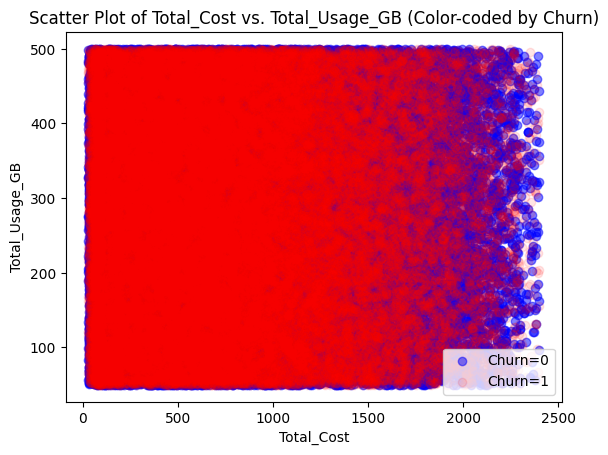

In [382]:
import matplotlib.pyplot as plt

# Filter data for Churn=0 and Churn=1
churn_0 = data[data['Churn'] == 0]
churn_1 = data[data['Churn'] == 1]

# Create a scatter plot for Churn=0
plt.scatter(churn_0['Total_Cost'], churn_0['Total_Usage_GB'], label='Churn=0', alpha=0.5, c='blue')

# Create a scatter plot for Churn=1
plt.scatter(churn_1['Total_Cost'], churn_1['Total_Usage_GB'], label='Churn=1', alpha=0.1, c='red')

# Add labels and a legend
plt.xlabel('Total_Cost')
plt.ylabel('Total_Usage_GB')
plt.legend()

# Show the plot
plt.title('Scatter Plot of Total_Cost vs. Total_Usage_GB (Color-coded by Churn)')
plt.show()


# Plot Graph

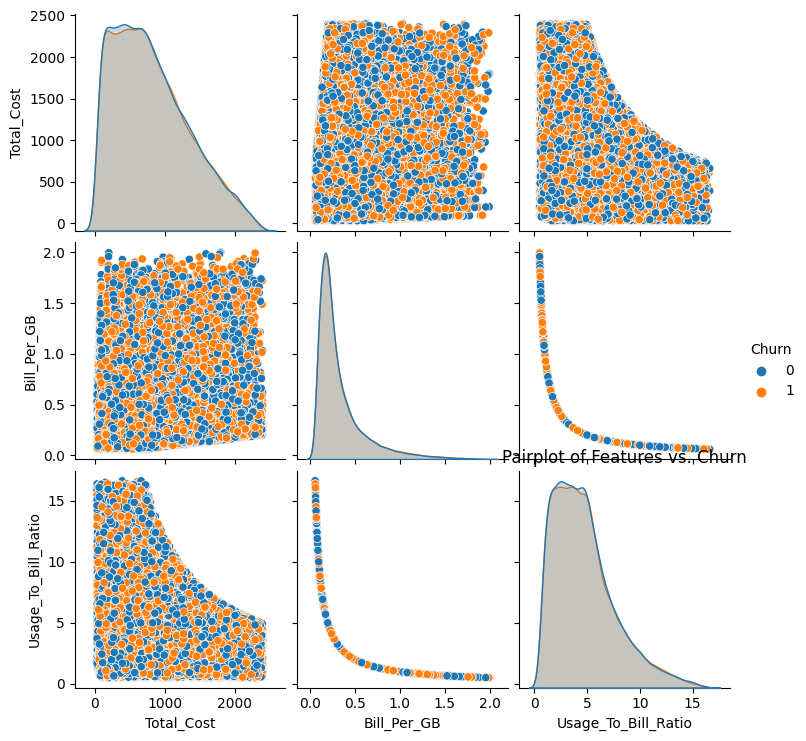

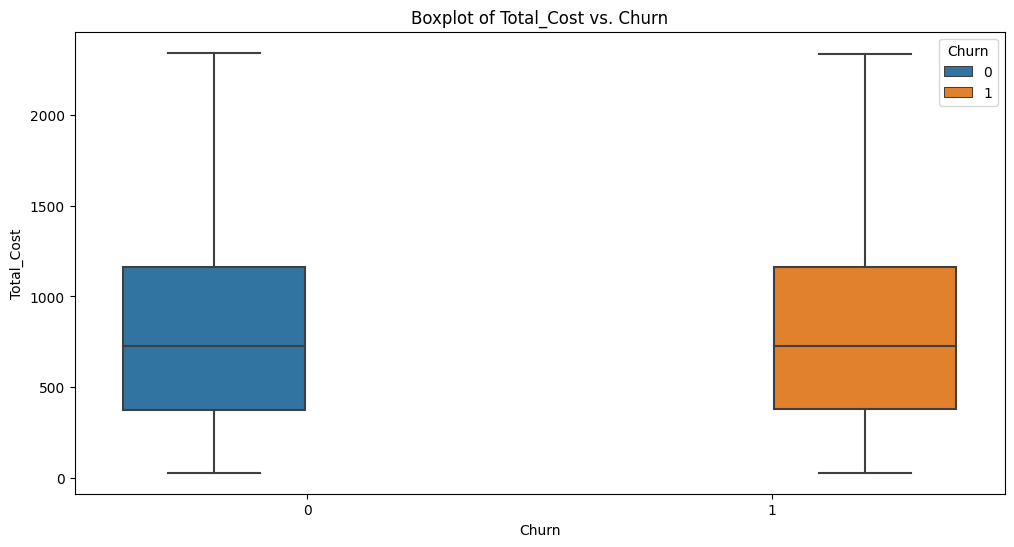

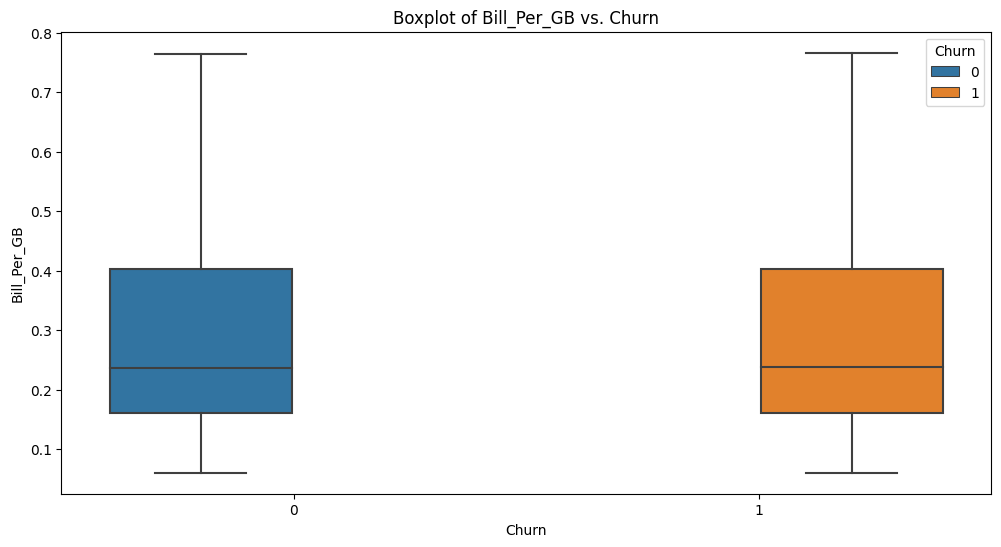

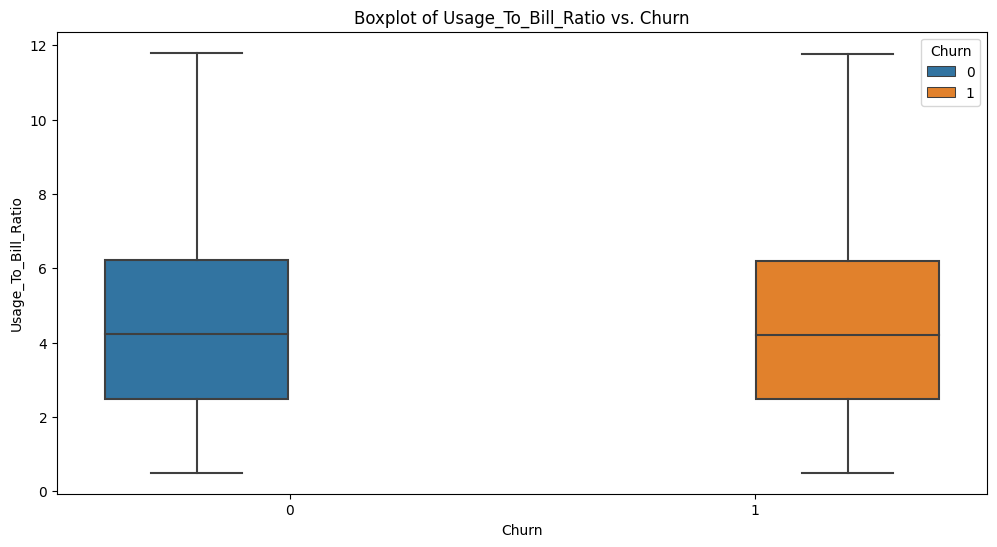

In [296]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pairplot to visualize relationships
sns.pairplot(x_df, hue='Churn', vars=['Total_Cost', 'Bill_Per_GB', 'Usage_To_Bill_Ratio'])
plt.title('Pairplot of Features vs. Churn')
plt.show()

# Create a boxplot to see how 'Total_Cost', 'Bill_Per_GB', and 'Usage_To_Bill_Ratio' vary with 'Churn'
plt.figure(figsize=(12, 6))
sns.boxplot(data=x_df, x='Churn', y='Total_Cost', hue='Churn', showfliers=False)
plt.title('Boxplot of Total_Cost vs. Churn')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=x_df, x='Churn', y='Bill_Per_GB', hue='Churn', showfliers=False)
plt.title('Boxplot of Bill_Per_GB vs. Churn')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=x_df, x='Churn', y='Usage_To_Bill_Ratio', hue='Churn', showfliers=False)
plt.title('Boxplot of Usage_To_Bill_Ratio vs. Churn')
plt.show()


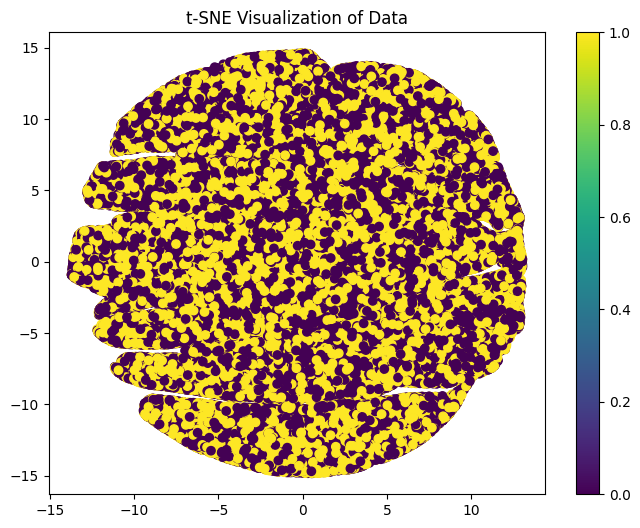

In [303]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop('Churn', axis=1))


from sklearn.manifold import TSNE
# Create a t-SNE model with desired parameters
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(X_scaled)


# Create a scatter plot of the t-SNE embedding
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['Churn'], cmap='viridis')
plt.title('t-SNE Visualization of Data')
plt.colorbar()
plt.show()


In [38]:
data

,Total_Cost,Bill_Per_GB,Usage_To_Bill_Ratio,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1247.12,0.310847,3.217012,1,2,17,73.36,236,0
1,48.76,0.283488,3.527482,0,4,1,48.76,172,0
2,427.35,0.185804,5.382005,0,2,5,85.47,460,0
3,293.82,0.329764,3.032469,0,3,3,97.94,297,1
4,1104.66,0.218571,4.575163,0,3,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,1267.99,0.243938,4.099401,1,1,23,55.13,226,1
99996,1171.35,0.175641,5.693431,0,4,19,61.65,351,0
99997,1633.87,0.382908,2.611591,1,0,17,96.11,251,1
99998,985.00,0.113479,8.812183,0,4,20,49.25,434,1


In [87]:
#cal avg cost per location
average_cost_per_location = data.groupby('Location')['Total_Cost'].mean().reset_index()
bill_per_location = data.groupby('Location')['Bill_Per_GB'].mean().reset_index()
print(bill_per_location)
#data['Cost'] = data['Subscription_Length_Months'] * data['Avg_Cost_Of_Location']


   Location  Bill_Per_GB
0         0     0.333736
1         1     0.336937
2         2     0.336130
3         3     0.334468
4         4     0.333069


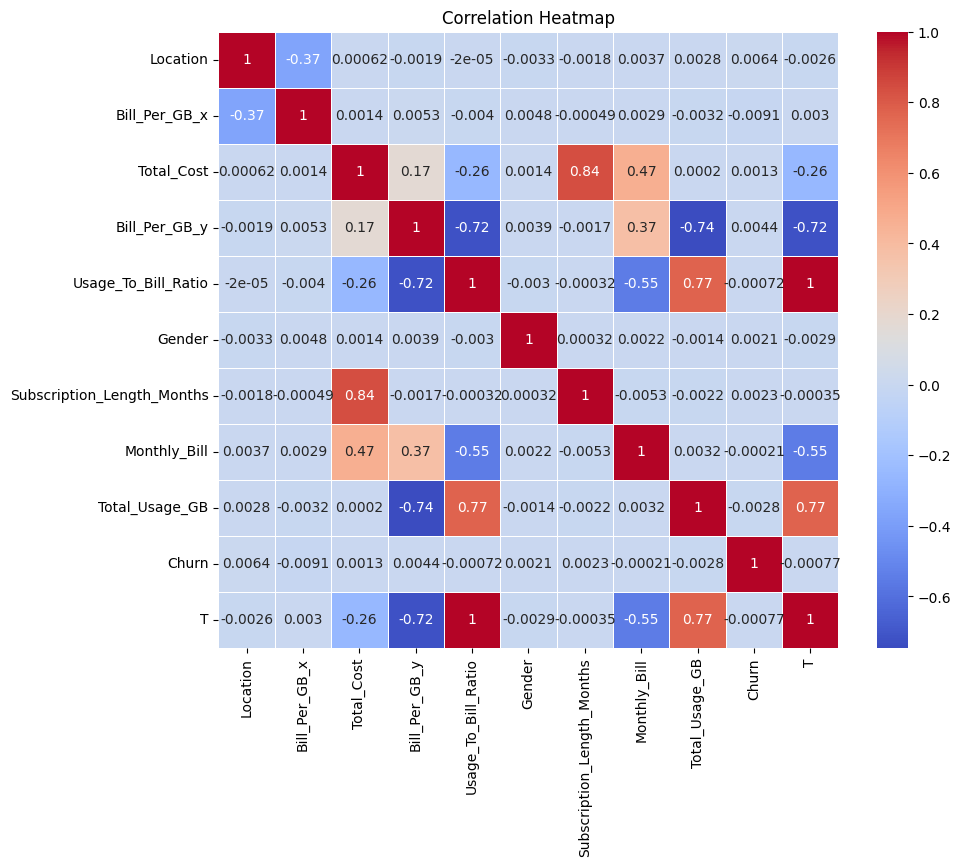

In [88]:
#checking something....
temp= bill_per_location
temp = temp.merge(data, on='Location', how='left')
temp['T' ]=(temp['Bill_Per_GB_x']*temp['Usage_To_Bill_Ratio'])
plot_color(temp.corr())

In [42]:
# Group the data by 'Location', 'Churn', and 'Gender', and then count the occurrences
result = data.groupby(['Location', 'Churn', 'Gender']).size().reset_index(name='Count')
# Pivot the result to have 'Churn' as columns
pivot_result = result.pivot(index=['Location', 'Gender'], columns='Churn', values='Count').fillna(0)
# Reset the index to make 'Location' and 'Gender' columns regular columns
pivot_result.reset_index(inplace=True)
print(pivot_result)

Churn  Location  Gender     0     1
0             0       0  5039  4997
1             0       1  4974  4948
2             1       0  5079  4918
3             1       1  5179  4981
4             2       0  5163  4928
5             2       1  4998  4952
6             3       0  4984  5106
7             3       1  4971  4970
8             4       0  5007  4995
9             4       1  4827  4984
